In [1]:
# For data manipulation
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Load the dataset
file_path = 'delaney_solubility_dataset.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())


   MolLogP    MolWt  NumRotatableBonds  AromaticProportion  logS
0   2.5954  167.850                0.0                 0.0 -2.18
1   2.3765  133.405                0.0                 0.0 -2.00
2   2.5938  167.850                1.0                 0.0 -1.74
3   2.0289  133.405                1.0                 0.0 -1.48
4   2.9189  187.375                1.0                 0.0 -3.04


In [4]:
# Display data info
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolLogP             1144 non-null   float64
 1   MolWt               1144 non-null   float64
 2   NumRotatableBonds   1144 non-null   float64
 3   AromaticProportion  1144 non-null   float64
 4   logS                1144 non-null   float64
dtypes: float64(5)
memory usage: 44.8 KB
None
MolLogP               0
MolWt                 0
NumRotatableBonds     0
AromaticProportion    0
logS                  0
dtype: int64
           MolLogP        MolWt  NumRotatableBonds  AromaticProportion  \
count  1144.000000  1144.000000        1144.000000         1144.000000   
mean      2.449133   204.631675           2.173951            0.364932   
std       1.866003   102.620500           2.627398            0.343305   
min      -7.571400    16.043000           0.000000            0.000000   
25

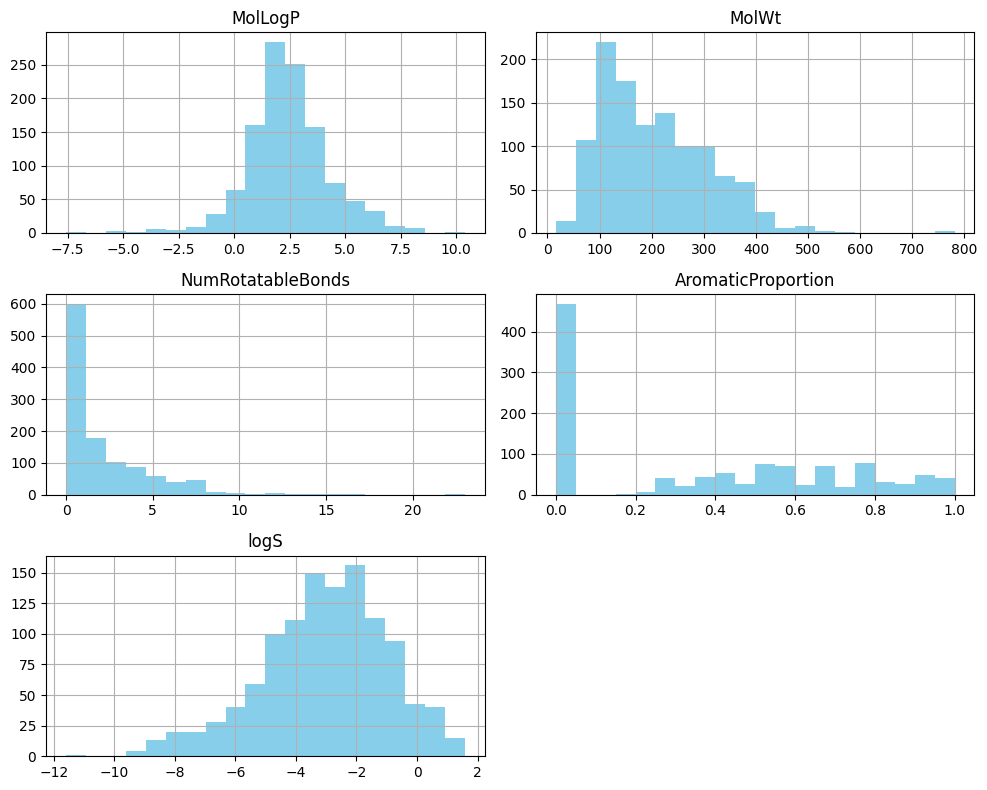

In [5]:
data.hist(figsize=(10, 8), bins=20, color='skyblue')
plt.tight_layout()
plt.show()


In [6]:
# Compute correlation matrix
corr_matrix = data.corr()
print(corr_matrix['logS'].sort_values(ascending=False))  # Correlation with target (logS)


logS                  1.000000
NumRotatableBonds    -0.238508
AromaticProportion   -0.268108
MolWt                -0.637324
MolLogP              -0.827959
Name: logS, dtype: float64


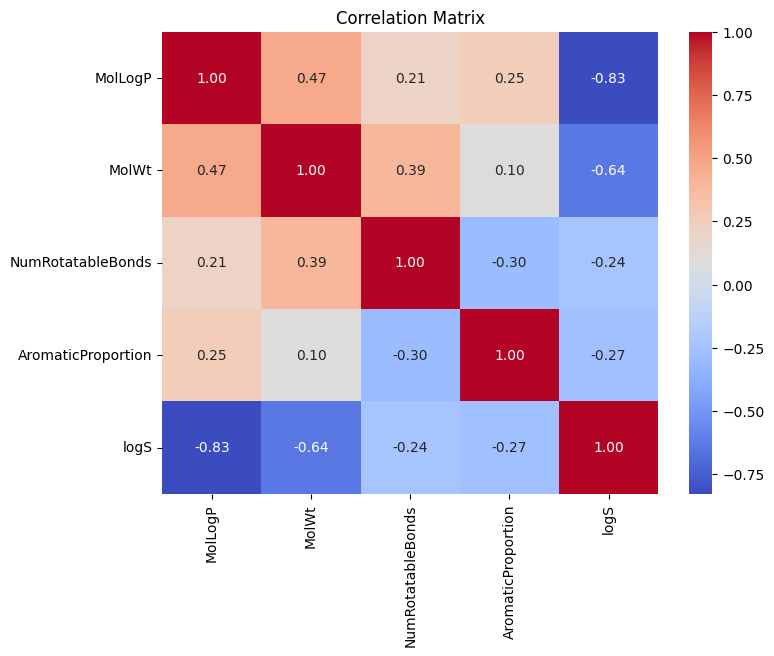

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

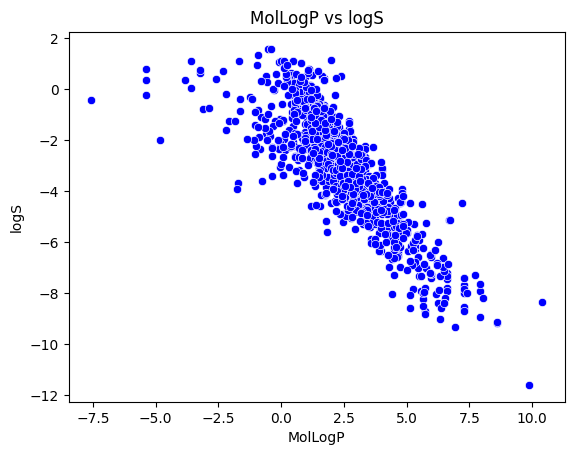

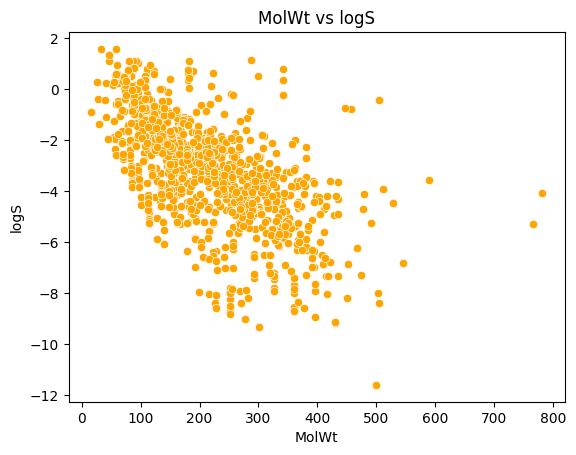

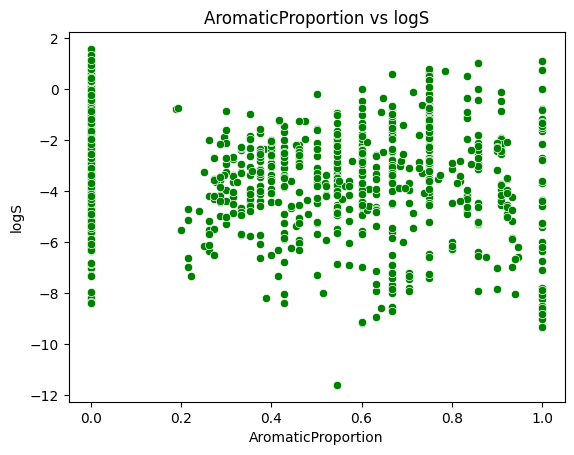

In [8]:
# Scatterplot for MolLogP vs logS
sns.scatterplot(data=data, x='MolLogP', y='logS', color='blue')
plt.title('MolLogP vs logS')
plt.show()

# Scatterplot for MolWt vs logS
sns.scatterplot(data=data, x='MolWt', y='logS', color='orange')
plt.title('MolWt vs logS')
plt.show()

# Scatterplot for AromaticProportion vs logS
sns.scatterplot(data=data, x='AromaticProportion', y='logS', color='green')
plt.title('AromaticProportion vs logS')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable h

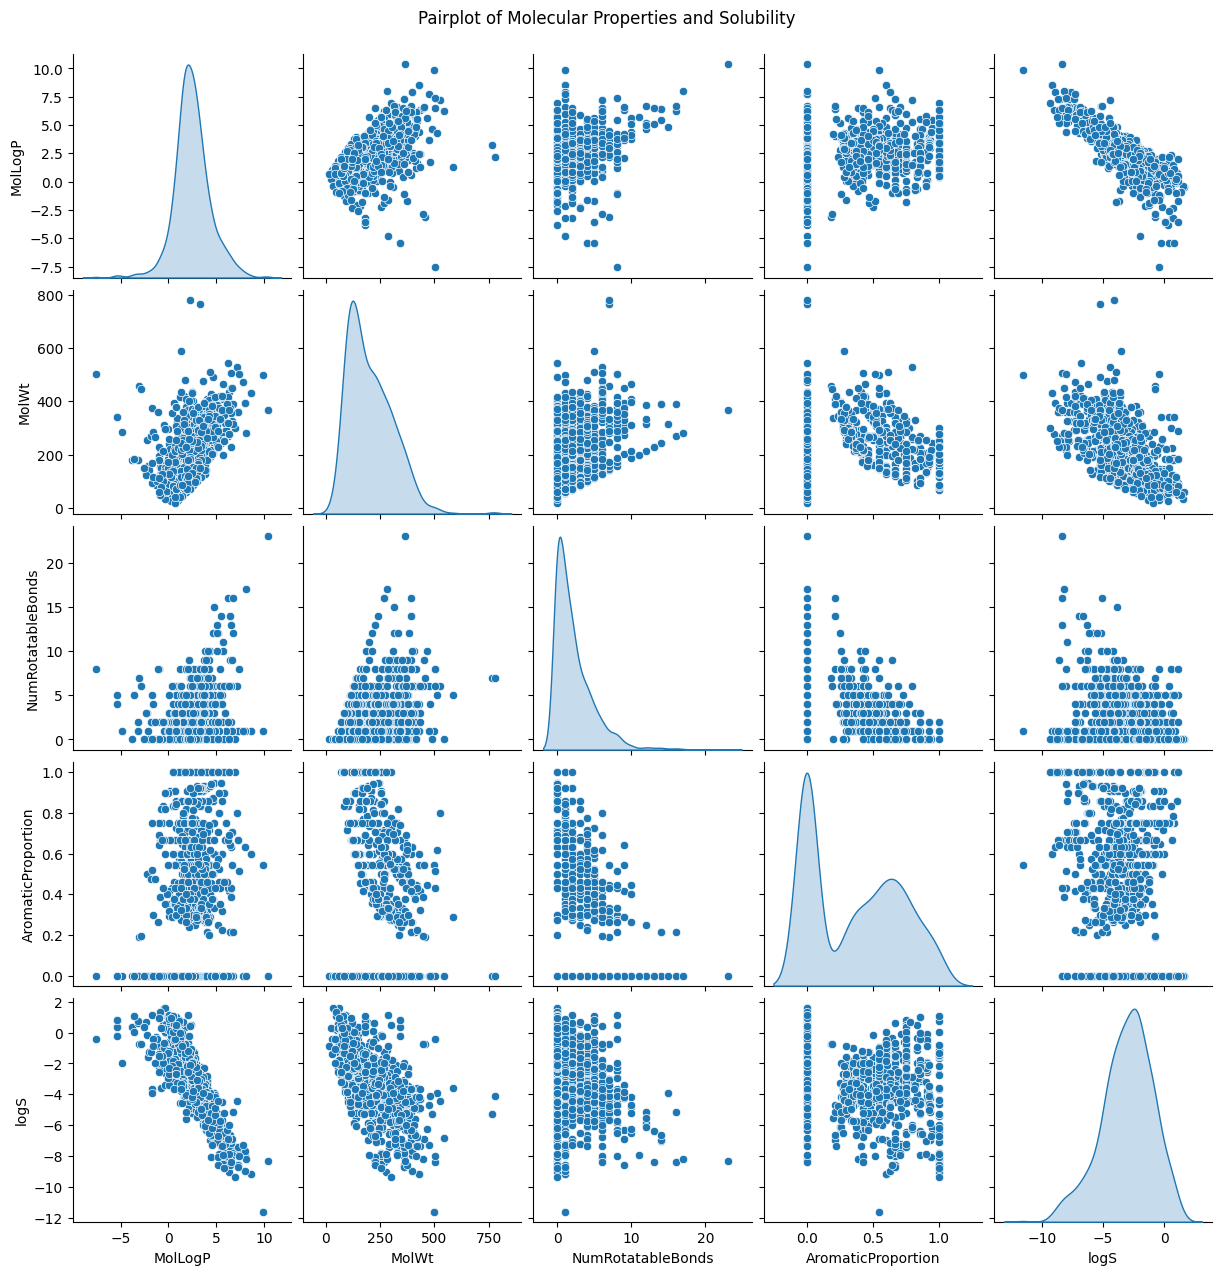

In [9]:
sns.pairplot(data, diag_kind='kde', palette='husl')
plt.suptitle('Pairplot of Molecular Properties and Solubility', y=1.02)
plt.show()


<ipython-input-10-43c22288d573>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='NumRotatableBonds', y='logS', palette='pastel')


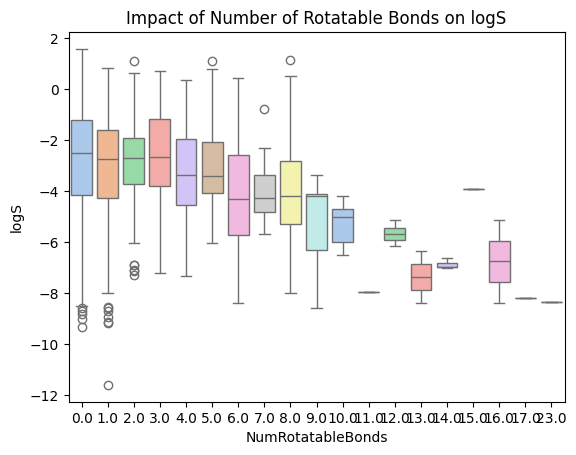

In [10]:
sns.boxplot(data=data, x='NumRotatableBonds', y='logS', palette='pastel')
plt.title('Impact of Number of Rotatable Bonds on logS')
plt.show()


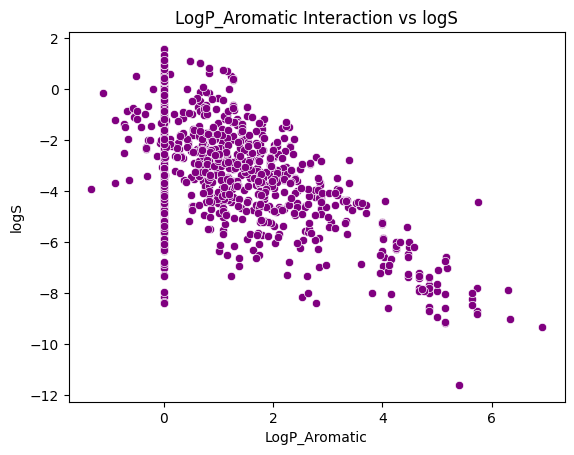

In [11]:
# Add an interaction term
data['LogP_Aromatic'] = data['MolLogP'] * data['AromaticProportion']

# Scatterplot of the interaction term vs logS
sns.scatterplot(data=data, x='LogP_Aromatic', y='logS', color='purple')
plt.title('LogP_Aromatic Interaction vs logS')
plt.show()


<ipython-input-12-9618b737ab48>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_matrix['logS'].drop('logS').index, y=corr_matrix['logS'].drop('logS').values, palette='viridis')


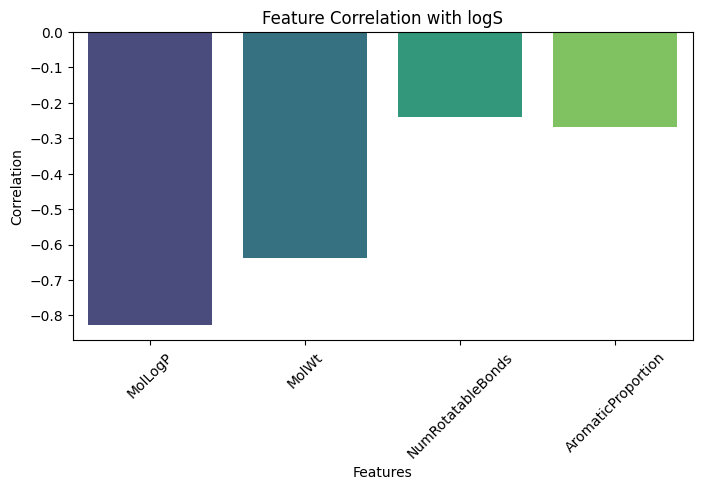

In [12]:
plt.figure(figsize=(8, 4))
sns.barplot(x=corr_matrix['logS'].drop('logS').index, y=corr_matrix['logS'].drop('logS').values, palette='viridis')
plt.title('Feature Correlation with logS')
plt.ylabel('Correlation')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()


<ipython-input-13-a309bdfc42b5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='NumRotatableBonds', y='logS', palette='muted')


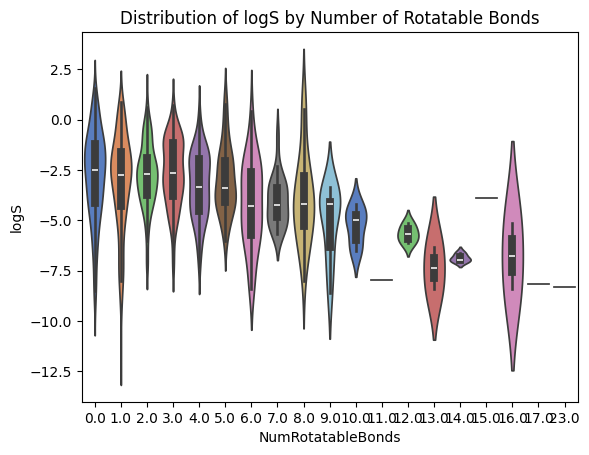

In [13]:
sns.violinplot(data=data, x='NumRotatableBonds', y='logS', palette='muted')
plt.title('Distribution of logS by Number of Rotatable Bonds')
plt.show()

In [14]:
# Identify outliers using IQR (Interquartile Range) method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Outlier condition: values outside 1.5 * IQR
outliers = data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]
print("Outliers detected:\n", outliers.dropna())


Outliers detected:
 Empty DataFrame
Columns: [MolLogP, MolWt, NumRotatableBonds, AromaticProportion, logS, LogP_Aromatic]
Index: []


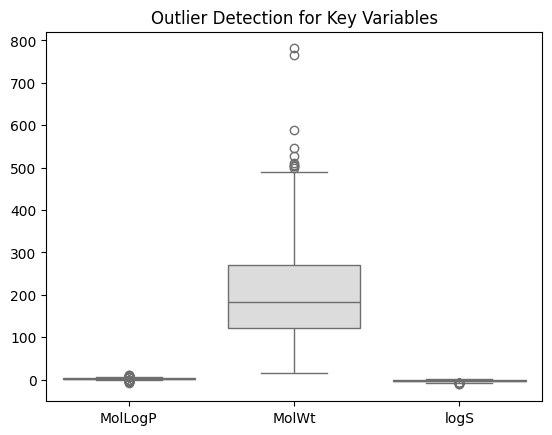

In [15]:
sns.boxplot(data=data[['MolLogP', 'MolWt', 'logS']], palette='coolwarm')
plt.title('Outlier Detection for Key Variables')
plt.show()


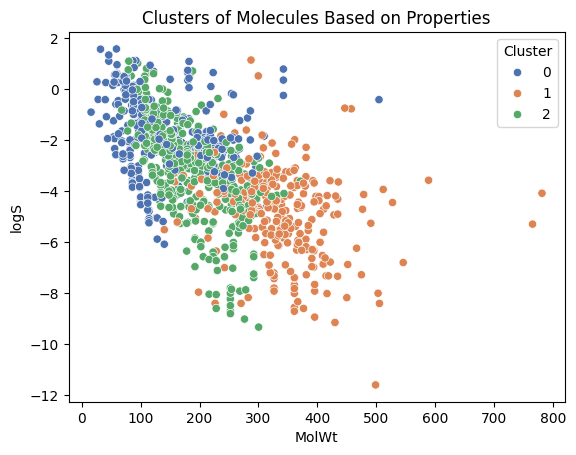

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['MolLogP', 'MolWt', 'NumRotatableBonds', 'AromaticProportion']])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize clusters (e.g., based on MolWt and logS)
sns.scatterplot(data=data, x='MolWt', y='logS', hue='Cluster', palette='deep')
plt.title('Clusters of Molecules Based on Properties')
plt.show()


In [17]:
data['LogP_MolWt'] = data['MolLogP'] * data['MolWt']
data['LogP_Aromatic'] = data['MolLogP'] * data['AromaticProportion']


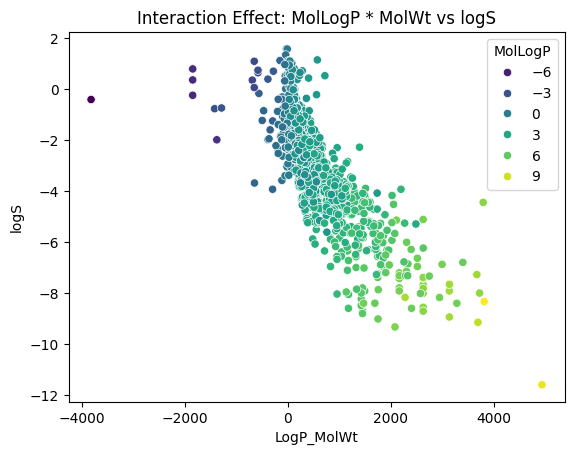

In [18]:
sns.scatterplot(data=data, x='LogP_MolWt', y='logS', hue='MolLogP', palette='viridis')
plt.title('Interaction Effect: MolLogP * MolWt vs logS')
plt.show()


Solubility_Class
Poorly Soluble        774
Moderately Soluble    303
Highly Soluble         67
Name: count, dtype: int64


<ipython-input-19-5fad156d218e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Solubility_Class', palette='Set3')


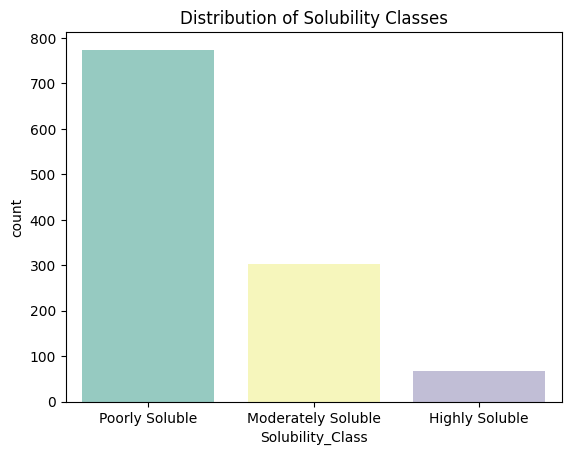

In [19]:
# Define solubility ranges
def classify_solubility(logS):
    if logS > 0: return 'Highly Soluble'
    elif -2 < logS <= 0: return 'Moderately Soluble'
    else: return 'Poorly Soluble'

# Create a new column for solubility categories
data['Solubility_Class'] = data['logS'].apply(classify_solubility)

# Count molecules in each solubility class
print(data['Solubility_Class'].value_counts())

# Visualize the distribution of solubility classes
sns.countplot(data=data, x='Solubility_Class', palette='Set3')
plt.title('Distribution of Solubility Classes')
plt.show()


<ipython-input-20-9727892f4915>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Solubility_Class', y='MolLogP', palette='Set2')


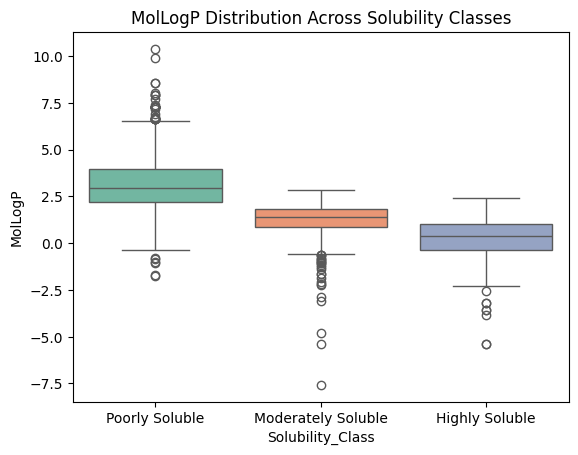

In [20]:
sns.boxplot(data=data, x='Solubility_Class', y='MolLogP', palette='Set2')
plt.title('MolLogP Distribution Across Solubility Classes')
plt.show()


<ipython-input-21-df2fdc7264ac>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Aromatic_Bin', y='logS', palette='rocket')


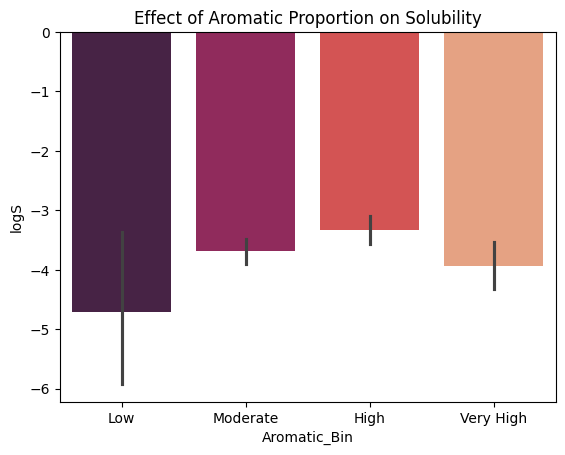

In [21]:
# Create bins for AromaticProportion
data['Aromatic_Bin'] = pd.cut(data['AromaticProportion'], bins=[0, 0.25, 0.5, 0.75, 1.0], labels=['Low', 'Moderate', 'High', 'Very High'])

# Plot average logS for each bin
sns.barplot(data=data, x='Aromatic_Bin', y='logS', palette='rocket')
plt.title('Effect of Aromatic Proportion on Solubility')
plt.show()


          MolLogP       MolWt  NumRotatableBonds  AromaticProportion  \
count  346.000000  346.000000         346.000000          346.000000   
mean     4.345773  287.044295           3.049133            0.452940   
std      1.460662   99.307943           3.592329            0.342143   
min      1.171600  100.205000           0.000000            0.000000   
25%      3.365375  223.102000           0.000000            0.000000   
50%      4.073950  289.141500           2.000000            0.490000   
75%      5.262935  348.390750           5.000000            0.714286   
max     10.388600  780.949000          23.000000            1.000000   

             logS  LogP_Aromatic     Cluster   LogP_MolWt  
count  346.000000     346.000000  346.000000   346.000000  
mean    -5.556347       2.066320    1.289017  1298.079421  
std      1.357301       1.787841    0.597333   745.727075  
min    -11.600000       0.000000    0.000000   269.401143  
25%     -6.314500       0.000000    1.000000   755.

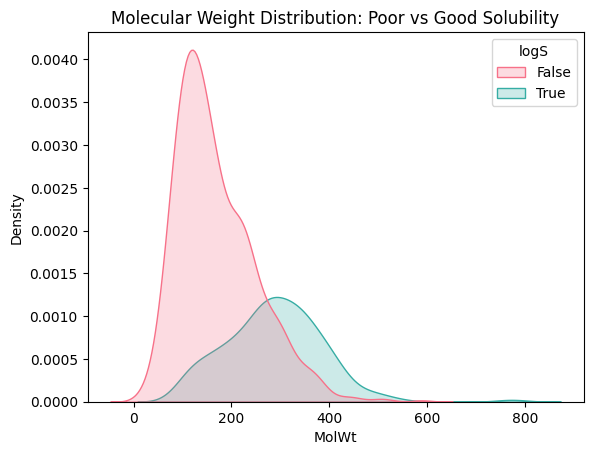

In [22]:
# Filter data for poorly soluble molecules
poor_solubility = data[data['logS'] < -4]
print(poor_solubility.describe())

# Compare distributions of key features (e.g., MolWt, MolLogP)
sns.kdeplot(data=data, x='MolWt', hue=(data['logS'] < -4), fill=True, palette='husl')
plt.title('Molecular Weight Distribution: Poor vs Good Solubility')
plt.show()


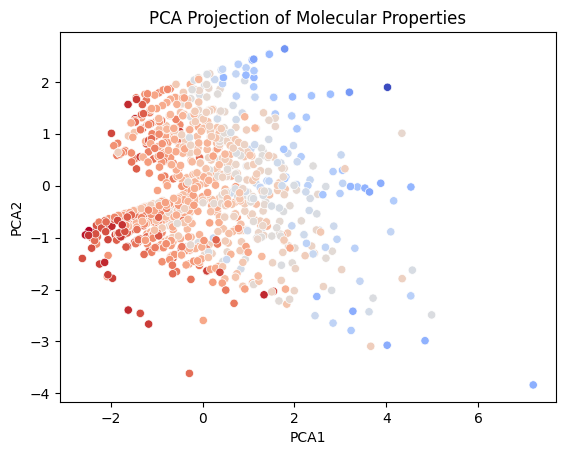

In [23]:
from sklearn.decomposition import PCA

# Standardize features
scaled_data = scaler.fit_transform(data[['MolLogP', 'MolWt', 'NumRotatableBonds', 'AromaticProportion']])

# Perform PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Add PCA results to dataset
data['PCA1'] = pca_data[:, 0]
data['PCA2'] = pca_data[:, 1]

# Scatterplot of PCA results
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='logS', palette='coolwarm', legend=False)
plt.title('PCA Projection of Molecular Properties')
plt.show()

In [24]:
from scipy.stats import ttest_ind

# Split data into low and high molecular weight groups
low_mw = data[data['MolWt'] <= data['MolWt'].median()]['logS']
high_mw = data[data['MolWt'] > data['MolWt'].median()]['logS']

# Perform t-test
t_stat, p_value = ttest_ind(low_mw, high_mw)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 23.504430948066553, P-value: 5.838615892422291e-100
